# Normalization and Standardization

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Height and Weight

In [6]:
df = pd.read_csv("weight-height.csv")
df = df[["Height", "Weight"]]
df.head()

Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801

In [7]:
df.shape

(10000, 2)

In [8]:
df.mean()

Height     66.367560
Weight    161.440357
dtype: float64

In [9]:
df.std()

Height     3.847528
Weight    32.108439
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Weight'>

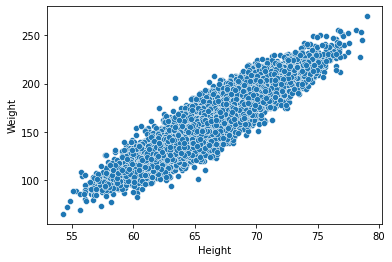

In [11]:
sns.scatterplot(x=df["Height"], y=df["Weight"])

In [13]:
df_s = StandardScaler().fit_transform(df)
df_s

array([[ 1.94406149,  2.50579697],
       [ 0.62753668,  0.02710064],
       [ 2.01244346,  1.59780623],
       ...,
       [-0.64968792, -1.02672965],
       [ 0.69312469,  0.07512745],
       [-1.14970831, -1.48850724]])

<AxesSubplot:>

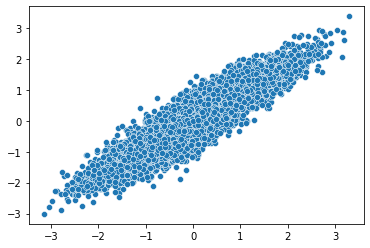

In [14]:
sns.scatterplot(x=df_s[:, 0], y=df_s[:, 1])

In [15]:
df_m = MinMaxScaler().fit_transform(df)
df_m

array([[0.79172838, 0.863139  ],
       [0.58695829, 0.4754764 ],
       [0.8023644 , 0.72113127],
       ...,
       [0.38830089, 0.31065968],
       [0.59715974, 0.48298768],
       [0.31052854, 0.23843869]])

<AxesSubplot:>

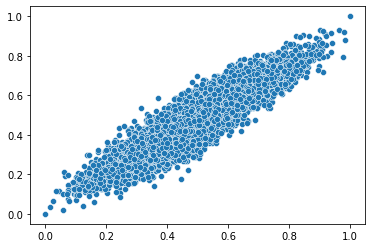

In [16]:
sns.scatterplot(x=df_m[:, 0], y=df_m[:, 1])

# Experiment Design

In [17]:
from scipy.stats import ttest_ind

from statsmodels.stats.power import TTestIndPower

In [23]:
def simulate_two_gaussians(n1_samples=100, n2_samples=100, n_simulations=1000, mu1=0, mu2=1, s1=1, s2=1):
    samples_1 = [np.random.normal(loc=mu1, scale=s1, size=n1_samples) for i in range(n_simulations)]
    means_1 = np.mean(samples_1, axis=1)
    
    samples_2 = [np.random.normal(loc=mu2, scale=s2, size=n2_samples) for i in range(n_simulations)]
    means_2 = np.mean(samples_2, axis=1)
    
    plt.hist(means_1, bins=50, color="y")
    plt.hist(means_2, bins=50, color="b")

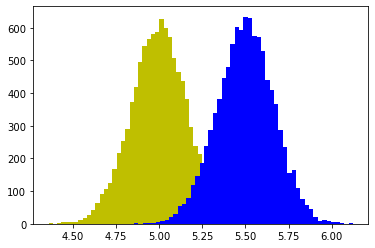

In [38]:
n1_samples = 15000 #
n2_samples = 15000 #
n_simulations = 10000
mu1 = 5
mu2 = 5.5
s1 = 20
s2 = 20
simulate_two_gaussians(n1_samples=n1_samples, n2_samples=n2_samples, n_simulations=n_simulations, mu1=mu1, mu2=mu2, s1=s1, s2=s2)

In [39]:
ttest_ind(np.random.normal(loc=mu1, scale=s1, size=n1_samples), np.random.normal(loc=mu2, scale=s2, size=n2_samples), alternative="less")

Ttest_indResult(statistic=-1.4016329434124881, pvalue=0.08051761520263243)

## Youtube case
For a specific effect size, and specific alpha and beta, calculate the number of samples required

In [40]:
prev_yt_data = pd.read_csv("prev_data.csv")
prev_yt_data

date  customer_id  premium  watch_time_hrs
0      2017-05-23          865        0        4.014356
1      2017-04-27          538        0        2.276858
2      2017-09-06          495        0        4.695549
3      2017-03-15          247        0        1.244982
4      2017-10-25          471        0        2.558311
...           ...          ...      ...             ...
19995  2017-08-08          193        0        2.980606
19996  2017-09-18           67        0        3.900742
19997  2017-08-14          421        0       16.966625
19998  2017-02-03          915        0        2.422626
19999  2017-05-13          231        0        2.962032

[20000 rows x 4 columns]

In [41]:
prev_yt_data.describe()

customer_id       premium  watch_time_hrs
count  20000.000000  20000.000000    20000.000000
mean     496.860200      0.155450        8.121169
std      287.733041      0.362342      212.138482
min        0.000000      0.000000        0.192767
25%      250.000000      0.000000        1.769474
50%      496.000000      0.000000        2.854844
75%      742.250000      0.000000        4.551919
max      999.000000      1.000000    10008.561895

In [42]:
q998 = prev_yt_data["watch_time_hrs"].quantile(0.998)
q998

23.93426900607841

In [43]:
prev_yt_data_no_out = prev_yt_data[prev_yt_data["watch_time_hrs"]<q998]

In [46]:
prev_yt_data_no_out.describe()

customer_id       premium  watch_time_hrs
count  19960.000000  19960.000000    19960.000000
mean     496.965180      0.155261        3.578971
std      287.699416      0.362162        2.676111
min        0.000000      0.000000        0.192767
25%      250.000000      0.000000        1.768304
50%      496.000000      0.000000        2.850750
75%      743.000000      0.000000        4.534618
max      999.000000      1.000000       23.933561

In [61]:
mu_h0 = np.mean(prev_yt_data_no_out["watch_time_hrs"])
mu_h0

3.578971070350512

In [62]:
diff_mu = np.abs(mu_h0 * 0.1)
diff_mu

0.35789710703505123

In [63]:
cohens_d_effect_size = diff_mu/np.std(prev_yt_data_no_out["watch_time_hrs"])
cohens_d_effect_size

0.13374109689019162

In [64]:
alpha = 0.05
power = 0.9

In [65]:
## H0: Premium users and non-premium users have the same watch time
## Ha: Premium users watch time < non-premium users watch time
n1 = len(prev_yt_data_no_out[prev_yt_data_no_out["premium"] == 1])
n1

3099

In [72]:
ratio = TTestIndPower().solve_power(effect_size=cohens_d_effect_size, alpha=alpha, power=power, nobs1=n1, ratio=None)

In [74]:
n2 = ratio * n1
n2

725.2944159419919